## CGC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_cgc = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/cgc.csv')
df_cgc['Date'] = pd.to_datetime(df_cgc['Date'])
df_cgc = df_cgc.set_index('Date')
df_cgc = df_cgc.rename(columns={'Open':'cgc_Open', 'High':'cgc_High', 'Low':'cgc_Low', 'Close':'cgc_Close', 'Volume':'cgc_Volume'})
df_cgc = df_cgc.drop('Adj Close', axis=1)
df_cgc['cgc_prev_close'] = df_cgc['cgc_Close'].shift(1)
df_cgc['cgc_next_close'] = df_cgc['cgc_Close'].shift(-1)
df_cgc['cgc_diff'] = df_cgc['cgc_Close'].diff()
df_cgc['cgc_%change'] = df_cgc['cgc_Close'].pct_change()
df_cgc['cgc_5day_avg_close'] = df_cgc['cgc_Close'].rolling(5).mean()
df_cgc['cgc_5day_avg_diff'] = df_cgc['cgc_diff'].rolling(5).mean()
df_cgc['cgc_10day_avg_close'] = df_cgc['cgc_Close'].rolling(10).mean()
df_cgc['cgc_10day_avg_diff'] = df_cgc['cgc_diff'].rolling(10).mean()

In [4]:
df_cgc

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970             NaN    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  
Date                            
2014-04-07                 NaN  
2014-04-08                 NaN  
2014-04-09                 NaN  
2014-04-10                 NaN  
2014-04-11                 NaN  
...                        ...  
2022-05-03               0.013  
2022-05-04               0.094  
2022-05-05               0.032  
2022-05-06               0.040  
2022-05-09              -0.002  

[2038 rows x 13 columns]

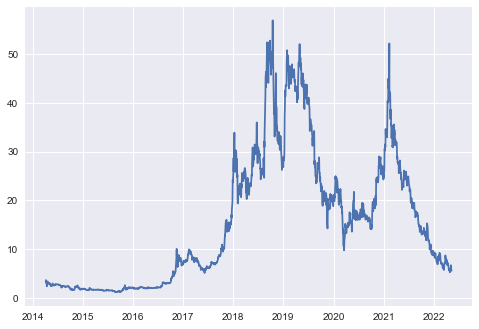

In [5]:
plt.plot(df_cgc['cgc_Close'])

In [6]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [7]:
df0 = pd.merge(df_cgc, df_dow, on='Date', how='left')
df0

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970             NaN    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 NaN   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 NaN   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 NaN   16256.14   16438.82  16256.14    16437.18   
2014-04-10                 NaN   16437.18   16455.29  16153.59    16170.22   
2014-04-11                 NaN   16170.22   16170.22  16015.32    16052.12   
...                        ...        ...        ...       ...         ...   
2022-05-03               0.013   33086.09   33341.58  32914.75    33128.79   
2022-05-04               0.094   33171.80   34117.74  33021.84    34061.06   
2022-05-05               0.032   33854.17   33854.17  32685.10    32997.97   
2022-05-06               0.040   32773.88   33055.84  32474.69    32899.37   
2022-05-09              -0.002   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18    

In [8]:
df_isna0 = df0.isna()
df_isna0

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                True      False      False     False       False   
2014-04-08                True      False      False     False       False   
2014-04-09                True      False      False     False       False   
2014-04-10                True      False      False     False       False   
2014-04-11                True      False      False     False       False   
...                        ...        ...        ...       ...         ...   
2022-05-03               False      False      False     False       False   
2022-05-04               False      False      False     False       False   
2022-05-05               False      False      False     False       False   
2022-05-06               False      False      False     False       False   
2022-05-09               False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07        False            False            False      False   
2014-04-08        False            False            False    

In [9]:
df_isna0 = df_isna0.add_suffix('_b')

In [10]:
df0 = df0.fillna(0)
df0.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 0.0   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 0.0   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 0.0   16256.14   16438.82  16256.14    16437.18   
2014-04-10                 0.0   16437.18   16455.29  16153.59    16170.22   
2014-04-11                 0.0   16170.22   16170.22  16015.32    16052.12   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18      10.27   
2014-04-09   91547700.0         16256.14         16170.22     181.04   
2014-04-10  112559553.0         16437.18         16052.12    -266.96   
2014-04-11  119598160.0         16170.22         16173.24    -118.10   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2014-04-07     -0.010654            16468.968             -42.358   
2014-04-08      0.000632            16413.674             -55.294   
2014-04-09      0.011137            16386.510             -27.164   
2014-04-10     -0.016241            16306.044             -80.466   
2014-04-11     -0.007304            16232.306             -73.738   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2014-04-07             16402.666               -3.082  
2014-04-08             16391.492              -11.174  
2014-04-09             16408.311               16.819  
2014-04-10             16398.910               -9.401  
2014-04-11             16371.816              -27.094

In [11]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07               0.000   16420.81   16421.25  16244.39    16245.87   
2014-04-08               0.000   16245.87   16296.86  16180.68    16256.14   
2014-04-09               0.000   16256.14   16438.82  16256.14    16437.18   
2014-04-10               0.000   16437.18   16455.29  16153.59    16170.22   
2014-04-11               0.000   16170.22   16170.22  16015.32    16052.12   
...                        ...        ...        ...       ...         ...   
2022-05-03               0.013   33086.09   33341.58  32914.75    33128.79   
2022-05-04               0.094   33171.80   34117.74  33021.84    34061.06   
2022-05-05               0.032   33854.17   33854.17  32685.10    32997.97   
2022-05-06               0.040   32773.88   33055.84  32474.69    32899.37   
2022-05-09              -0.002   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18    

In [12]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [13]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [14]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 0.0   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 0.0   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 0.0   16256.14   16438.82  16256.14    16437.18   
2014-04-10                 0.0   16437.18   16455.29  16153.59    16170.22   
2014-04-11                 0.0   16170.22   16170.22  16015.32    16052.12   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18      10.27   
2014-04-09   91547700.0         16256.14         16170.22     181.04   
2014-04-10  112559553.0         16437.18         16052.12    -266.96   
2014-04-11  119598160.0         16170.22         16173.24    -118.10   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2014-04-07     -0.010654            16468.968             -42.358   
2014-04-08      0.000632            16413.674             -55.294   
2014-04-09      0.011137            16386.510             -27.164   
2014-04-10     -0.016241            16306.044             -80.466   
2014-04-11     -0.007304            16232.306             -73.738   

            djix_10day_avg_close  djix_10day_avg_diff  cgc_Open_b  cgc_High_b  \
Date                                                                            
2014-04-07             16402.666               -3.082       False       False   
2014-04-08             16391.492              -11.174       False       False   
2014-04-09             16408.311               16.819       False       False   
2014-04-10             16398.910               -9.401       False       False   
2014-04-11             16371.816              -27.094       False       False   

            cgc_Low_b  cgc_Close_b  cgc_Volume_b  cgc_prev_close_b  \
Date                                                                 
2014-04-07      False        False         False              True   
2014-04-08      False        False         

In [15]:
df0.drop(df0.tail(1).index, inplace=True)

In [16]:
df0.shape

(2037, 56)

In [17]:
n = int(len(df0) * 0.9)
n

1833

In [18]:
train0 = df0[:n]
test0 = df0[n:]

In [19]:
print(len(train0))
print(len(test0))

1833
204


In [20]:
X_train0 = train0.drop('cgc_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 0.0   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 0.0   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 0.0   16256.14   16438.82  16256.14    16437.18   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18      10.27   
2014-04-09   91547700.0         16256.14         16170.22     181.04   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2014-04-07     -0.010654            16468.968             -42.358   
2014-04-08      0.000632            16413.674             -55.294   
2014-04-09      0.011137            16386.510             -27.164   

            djix_10day_avg_close  djix_10day_avg_diff  cgc_Open_b  cgc_High_b  \
Date                                                                            
2014-04-07             16402.666               -3.082       False       False   
2014-04-08             16391.492              -11.174       False       False   
2014-04-09             16408.311               16.819       False       False   

            cgc_Low_b  cgc_Close_b  cgc_Volume_b  cgc_prev_close_b  \
Date                                                                 
2014-04-07      False        False         False              True   
2014-04-08      False        False         False             False   
2014-04-09      False        False         False             False   

            cgc_next_close_b  cgc_diff_b  cgc_%change_b  cgc_5day_avg_close_b  \
Date                                                                            
2014-04-07             False        True           True                  True   
2014-04-08             False       False          False                  True   
2014-04-09             False       False          False                  True   

            cgc_5day_avg_diff_b  cgc_10day_avg_close_b  cgc_10day_avg_diff_b  \
Date                                                                           
2014-04-07                 True                   True                  True   
2014-04-08                 True                   True                  True   
2014-04-09                 True                   True                  True   

            djix_Open_b  djix_High_b  djix_Low_b  djix_Close_b  djix_Volume_b  \
Date                                                                            
2014-04-07        False        False       False         False          False   
2014

In [21]:
X_train0.shape

(1833, 55)

In [22]:
y_train0 = train0['cgc_next_close']
y_train0.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [23]:
y_train0.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [24]:
X_test0 = test0.drop('cgc_next_close', axis=1)
y_test0 = test0['cgc_next_close']

In [25]:
X_test0.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2021-07-19              -0.387   34528.48   34528.48  33741.76    33962.04   
2021-07-20              -0.293   33981.79   34621.79  33981.79    34511.99   
2021-07-21              -0.176   34556.96   34820.24  34556.96    34798.00   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-07-19  510463173.0         34687.85         34511.99    -725.81   
2021-07-20  433906425.0         33962.04         34798.00     549.95   
2021-07-21  358437114.0         34511.99         34823.35     286.01   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-07-19     -0.020924            34691.786            -206.828   
2021-07-20      0.016193            34616.426             -75.360   
2021-07-21      0.008287            34589.380             -27.046   

            djix_10day_avg_close  djix_10day_avg_diff  cgc_Open_b  cgc_High_b  \
Date                                                                            
2021-07-19             34700.636              -82.431       False       False   
2021-07-20             34694.098               -6.538       False       False   
2021-07-21             34705.719               11.621       False       False   

            cgc_Low_b  cgc_Close_b  cgc_Volume_b  cgc_prev_close_b  \
Date                                                                 
2021-07-19      False        False         False             False   
2021-07-20      False        False         False             False   
2021-07-21      False        False         False             False   

            cgc_next_close_b  cgc_diff_b  cgc_%change_b  cgc_5day_avg_close_b  \
Date                                                                            
2021-07-19             False       False          False                 False   
2021-07-20             False       False          False                 False   
2021-07-21             False       False          False                 False   

            cgc_5day_avg_diff_b  cgc_10day_avg_close_b  cgc_10day_avg_diff_b  \
Date                                                                           
2021-07-19                False                  False                 False   
2021-07-20                False                  False                 False   
2021-07-21                False                  False                 False   

            djix_Open_b  djix_High_b  djix_Low_b  djix_Close_b  djix_Volume_b  \
Date                                                                            
2021-07-19        False        False       False         False   

In [26]:
X_test0.shape

(204, 55)

In [27]:
y_test0.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [29]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [30]:
y_pred0[:5]

array([19.71314326, 20.21826362, 20.45950619, 19.99221631, 19.71445779])

In [31]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.4606653984976911


In [32]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.3548890325107604


In [33]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['cgc_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['cgc_next_close'])

In [35]:
y_test0['cgc_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             6.231732
2022-05-03            6.67             6.926132
2022-05-04            6.07             5.974439
2022-05-05            5.97             5.732254
2022-05-06            5.55             5.467381

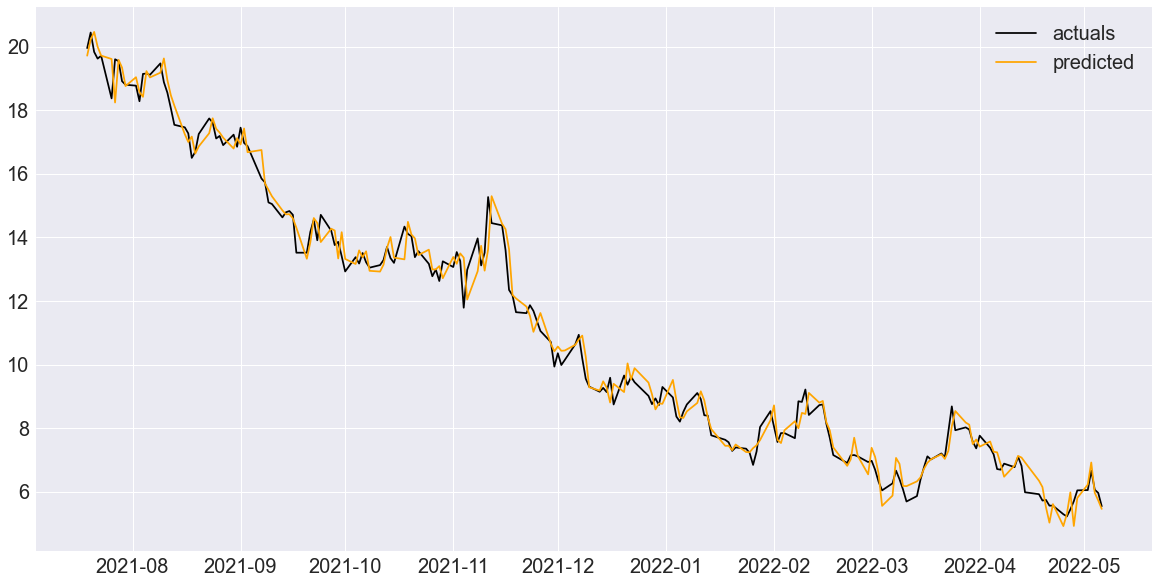

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['cgc_next_close'], color='black')
ax.plot(y_test0['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [38]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [39]:
df1 = pd.merge(df_cgc, df_etfs, on='Date', how='left')
df1

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970             NaN    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-08                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-09                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-10                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-11                 NaN      NaN      NaN     NaN       NaN        NaN   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               0.013     8.34    8.470    8.24      8.32  1031400.0   
2022-05-04               0.094     8.34    8.590    8.10      8.59   934900.0   
2022-05-05               0.032     8.50    8.508    8.01      8.05   849400.0   
2022-05-06               0.040     8.01    8.050    7.75      7.90  1354600.0   
2022-05-09              -0.002     7.79    7.800    7.44      7.45  2225100.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            NaN            NaN      NaN         NaN   
2014-04-08            NaN            NaN   

In [40]:
df_isna1 = df1.isna()
df_isna1

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                True     True     True    True      True       True   
2014-04-08                True     True     True    True      True       True   
2014-04-09                True     True     True    True      True       True   
2014-04-10                True     True     True    True      True       True   
2014-04-11                True     True     True    True      True       True   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               False    False    False   False     False      False   
2022-05-04               False    False    False   False     False      False   
2022-05-05               False    False    False   False     False      False   
2022-05-06               False    False    False   False     False      False   
2022-05-09               False    False    False   False     False      False   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           True           True     True        True   
2014-04-08           True           True   

In [41]:
df_isna1 = df_isna1.add_suffix('_b')

In [42]:
df1 = df1.fillna(0)
df1.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-10                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-11                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   
2014-04-10            0.0            0.0      0.0         0.0   
2014-04-11            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   
2014-04-10                0.0               0.0                 0.0   
2014-04-11                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   
2014-04-10                0.0        0.0        0.0       0.0         0.0   
2014-04-11                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   
2014-04-10          0.0              0.0              0.0        0.0   
2014-04-11          0.0              0.0            

In [43]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-08               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-09               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-10               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-11               0.000     0.00    0.000    0.00      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               0.013     8.34    8.470    8.24      8.32  1031400.0   
2022-05-04               0.094     8.34    8.590    8.10      8.59   934900.0   
2022-05-05               0.032     8.50    8.508    8.01      8.05   849400.0   
2022-05-06               0.040     8.01    8.050    7.75      7.90  1354600.0   
2022-05-09              -0.002     7.79    7.800    7.44      7.45  2225100.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           0.00           0.00     0.00    0.000000   
2014-04-08           0.00           0.00   

In [44]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [45]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [46]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-08               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-09               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-10               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-11               0.000     0.00    0.000    0.00      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               0.013     8.34    8.470    8.24      8.32  1031400.0   
2022-05-04               0.094     8.34    8.590    8.10      8.59   934900.0   
2022-05-05               0.032     8.50    8.508    8.01      8.05   849400.0   
2022-05-06               0.040     8.01    8.050  

In [47]:
df1.drop(df1.tail(1).index, inplace=True)

In [48]:
n = int(len(df1) * 0.9)
n

1833

In [49]:
train1 = df1[:n]
test1 = df1[n:]

In [50]:
print(len(train1))
print(len(test1))

1833
204


In [51]:
X_train1 = train1.drop('cgc_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2014-04-07           0.0                  0.0                 0.0   
2014-04-08           0.0                  0.0                 0.0   
2014-04-09           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2014-04-07                   0.0                  0.0        0.0        0.0   
2014-04-08                   0.0                  0.0        0.0        0.0   
2014-04-09                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2014-04-07       0.0         0.0          0.0              0.0   
2014-04-08       0.0         0.0          0.0              0.0   
2014-04-09       0.0         0.0          0.0              0.0   

 

In [52]:
X_train1.shape

(1833, 159)

In [53]:
y_train1 = train1['cgc_next_close']
y_train1.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [54]:
y_train1.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [55]:
X_test1 = test1.drop('cgc_next_close', axis=1)
y_test1 = test1['cgc_next_close']

In [56]:
X_test1.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                         
2021-07-19              -0.387  17.450001  17.625000  17.100000  17.440001   
2021-07-20              -0.293  17.549999  17.868999  17.190001  17.790001   
2021-07-21              -0.176  17.860001  18.275000  17.830000  18.270000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-07-19  1423400.0      17.750000      17.790001 -0.309999   -0.017465   
2021-07-20   983600.0      17.440001      18.270000  0.350000    0.020069   
2021-07-21   741500.0      17.790001      17.809999  0.479999    0.026981   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-07-19          18.292000            -0.406              18.906   
2021-07-20          17.956001            -0.336              18.688   
2021-07-21          17.890001            -0.066              18.573   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-07-19             -0.284  36.840000  36.840000  35.110001   36.139999   
2021-07-20             -0.218  36.099998  36.910000  36.035000   36.799999   
2021-07-21             -0.115  36.799999  37.790001  36.799999   37.500000   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-07-19     951100.0        37.419998        36.799999  -1.279999   
2021-07-20     396200.0        36.139999        37.500000   0.660000   
2021-07-21     422000.0        36.799999        37.080002   0.700001   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-07-19     -0.034206            38.161999              -0.836   
2021-07-20      0.018262            37.461999              -0.700   
2021-07-21      0.019022            37.185999              -0.276   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-07-19             39.121999               -0.446  18.870001  18.870001   
2021-07-20             38.816999               -0.305  18.510000  19.070000   
2021-07-21             38.559999               -0.257  19.000000  19.590000   

             yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                              
2021-07-19  18.011000   18.440001     402100.0        19.110001   
2021-07-20  18.447001   19.000000      89100.0        18.4400

In [57]:
X_test1.shape

(204, 159)

In [58]:
y_test1.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [59]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [60]:
y_pred1[:5]

array([19.98784373, 21.05557421, 19.86894737, 19.60400202, 19.69048087])

In [61]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.3664631587861211


In [62]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.25340570929306244


In [63]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['cgc_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['cgc_next_close'])

In [65]:
y_test1['cgc_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             6.354856
2022-05-03            6.67             6.550362
2022-05-04            6.07             6.051104
2022-05-05            5.97             5.366147
2022-05-06            5.55             6.145403

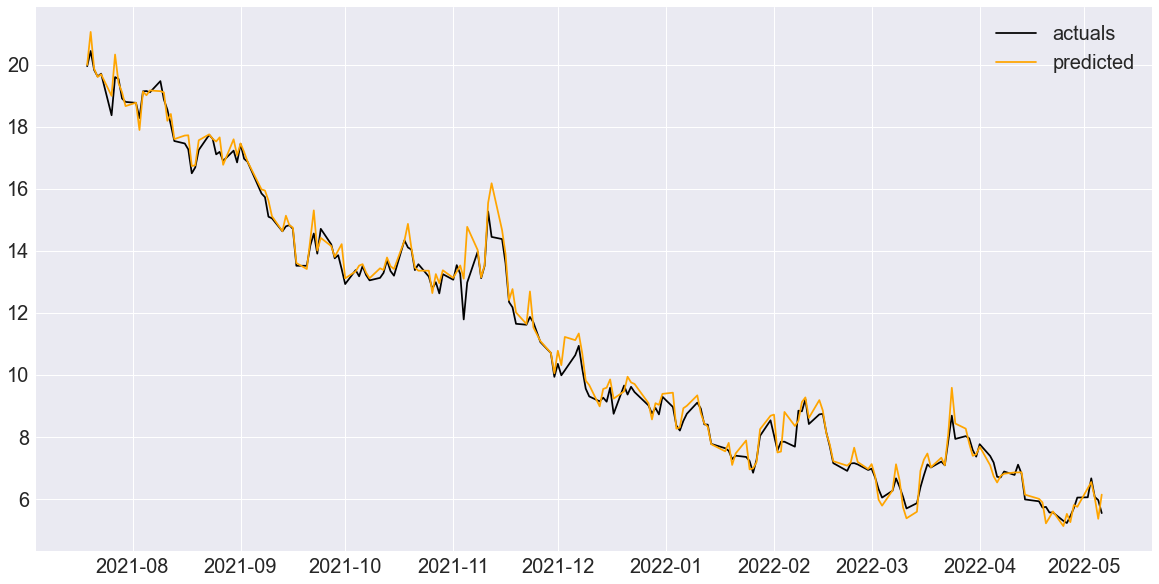

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['cgc_next_close'], color='black')
ax.plot(y_test1['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [68]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [69]:
df2 = pd.merge(df_cgc, df_etfs_dow, on='Date', how='left')
df2

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970             NaN    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-08                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-09                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-10                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-11                 NaN      NaN      NaN     NaN       NaN        NaN   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               0.013     8.34    8.470    8.24      8.32  1031400.0   
2022-05-04               0.094     8.34    8.590    8.10      8.59   934900.0   
2022-05-05               0.032     8.50    8.508    8.01      8.05   849400.0   
2022-05-06               0.040     8.01    8.050    7.75      7.90  1354600.0   
2022-05-09              -0.002     7.79    7.800    7.44      7.45  2225100.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            NaN            NaN      NaN         NaN   
2014-04-08            NaN            NaN   

In [70]:
df_isna2 = df2.isna()
df_isna2

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                True     True     True    True      True       True   
2014-04-08                True     True     True    True      True       True   
2014-04-09                True     True     True    True      True       True   
2014-04-10                True     True     True    True      True       True   
2014-04-11                True     True     True    True      True       True   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               False    False    False   False     False      False   
2022-05-04               False    False    False   False     False      False   
2022-05-05               False    False    False   False     False      False   
2022-05-06               False    False    False   False     False      False   
2022-05-09               False    False    False   False     False      False   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           True           True     True        True   
2014-04-08           True           True   

In [71]:
df_isna2 = df_isna2.add_suffix('_b')

In [72]:
df2 = df2.fillna(0)
df2.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-10                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-11                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   
2014-04-10            0.0            0.0      0.0         0.0   
2014-04-11            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   
2014-04-10                0.0               0.0                 0.0   
2014-04-11                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   
2014-04-10                0.0        0.0        0.0       0.0         0.0   
2014-04-11                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   
2014-04-10          0.0              0.0              0.0        0.0   
2014-04-11          0.0              0.0            

In [73]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-08               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-09               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-10               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-11               0.000     0.00    0.000    0.00      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               0.013     8.34    8.470    8.24      8.32  1031400.0   
2022-05-04               0.094     8.34    8.590    8.10      8.59   934900.0   
2022-05-05               0.032     8.50    8.508    8.01      8.05   849400.0   
2022-05-06               0.040     8.01    8.050    7.75      7.90  1354600.0   
2022-05-09              -0.002     7.79    7.800    7.44      7.45  2225100.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           0.00           0.00     0.00    0.000000   
2014-04-08           0.00           0.00   

In [74]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [75]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [76]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-08               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-09               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-10               0.000     0.00    0.000    0.00      0.00        0.0   
2014-04-11               0.000     0.00    0.000    0.00      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-03               0.013     8.34    8.470    8.24      8.32  1031400.0   
2022-05-04               0.094     8.34    8.590    8.10      8.59   934900.0   
2022-05-05               0.032     8.50    8.508    8.01      8.05   849400.0   
2022-05-06               0.040     8.01    8.050  

In [77]:
df2.drop(df2.tail(1).index, inplace=True)

In [78]:
n = int(len(df2) * 0.9)
n

1833

In [79]:
train2 = df2[:n]
test2 = df2[n:]

In [80]:
print(len(train2))
print(len(test2))

1833
204


In [81]:
X_train2 = train2.drop('cgc_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2014-04-07           0.0                  0.0                 0.0   
2014-04-08           0.0                  0.0                 0.0   
2014-04-09           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2014-04-07                   0.0                  0.0        0.0        0.0   
2014-04-08                   0.0                  0.0        0.0        0.0   
2014-04-09                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2014-04-07       0.0         0.0          0.0              0.0   
2014-04-08       0.0         0.0          0.0              0.0   
2014-04-09       0.0         0.0          0.0              0.0   

 

In [82]:
X_train2.shape

(1833, 185)

In [83]:
y_train2 = train2['cgc_next_close']
y_train2.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [84]:
y_train2.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [85]:
X_test2 = test2.drop('cgc_next_close', axis=1)
y_test2 = test2['cgc_next_close']

In [86]:
X_test2.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                         
2021-07-19              -0.387  17.450001  17.625000  17.100000  17.440001   
2021-07-20              -0.293  17.549999  17.868999  17.190001  17.790001   
2021-07-21              -0.176  17.860001  18.275000  17.830000  18.270000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-07-19  1423400.0      17.750000      17.790001 -0.309999   -0.017465   
2021-07-20   983600.0      17.440001      18.270000  0.350000    0.020069   
2021-07-21   741500.0      17.790001      17.809999  0.479999    0.026981   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-07-19          18.292000            -0.406              18.906   
2021-07-20          17.956001            -0.336              18.688   
2021-07-21          17.890001            -0.066              18.573   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-07-19             -0.284  36.840000  36.840000  35.110001   36.139999   
2021-07-20             -0.218  36.099998  36.910000  36.035000   36.799999   
2021-07-21             -0.115  36.799999  37.790001  36.799999   37.500000   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-07-19     951100.0        37.419998        36.799999  -1.279999   
2021-07-20     396200.0        36.139999        37.500000   0.660000   
2021-07-21     422000.0        36.799999        37.080002   0.700001   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-07-19     -0.034206            38.161999              -0.836   
2021-07-20      0.018262            37.461999              -0.700   
2021-07-21      0.019022            37.185999              -0.276   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-07-19             39.121999               -0.446  18.870001  18.870001   
2021-07-20             38.816999               -0.305  18.510000  19.070000   
2021-07-21             38.559999               -0.257  19.000000  19.590000   

             yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                              
2021-07-19  18.011000   18.440001     402100.0        19.110001   
2021-07-20  18.447001   19.000000      89100.0        18.4400

In [87]:
X_test2.shape

(204, 185)

In [88]:
y_test2.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [89]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [90]:
y_pred2[:5]

array([20.13053502, 21.23352596, 19.93215154, 19.62368676, 19.76654154])

In [91]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.49000539032141466


In [92]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.37685653796130053


In [93]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['cgc_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['cgc_next_close'])

In [95]:
y_test2['cgc_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             6.549169
2022-05-03            6.67             6.493763
2022-05-04            6.07             6.564320
2022-05-05            5.97             5.614954
2022-05-06            5.55             6.488858

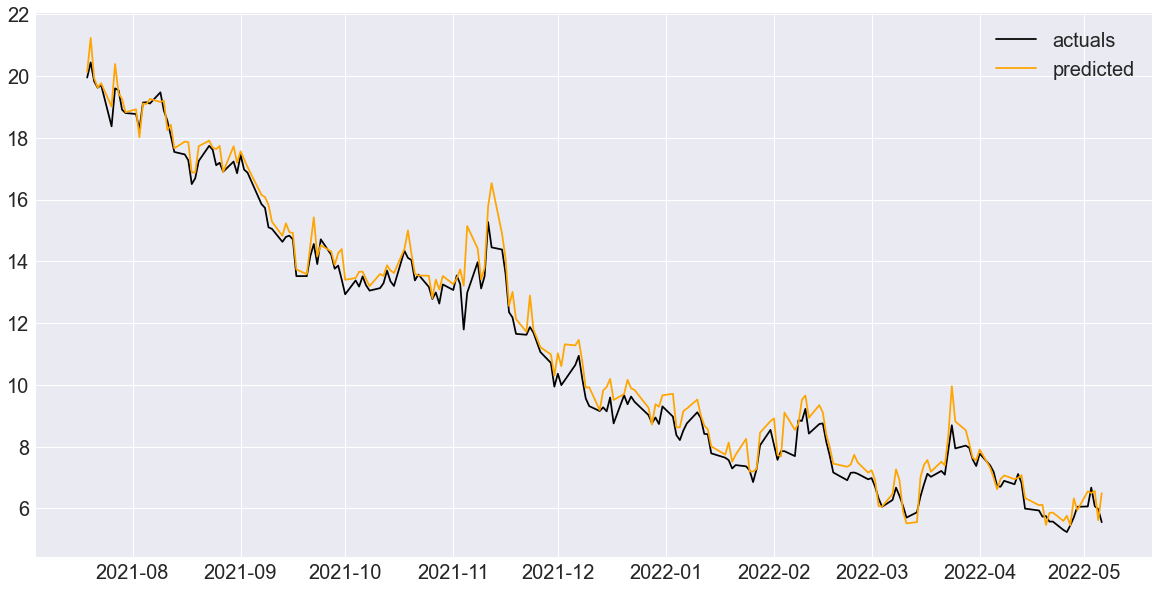

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['cgc_next_close'], color='black')
ax.plot(y_test2['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [98]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [99]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [100]:
df_isna3 = df_isna3.add_suffix('_b')

In [101]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [102]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [103]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [104]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [105]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [106]:
df3.drop(df3.tail(1).index, inplace=True)

In [107]:
n = int(len(df3) * 0.9)
n

1833

In [108]:
train3 = df3[:n]
test3 = df3[n:]

In [109]:
print(len(train3))
print(len(test3))

1833
204


In [110]:
X_train3 = train3.drop('cgc_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [111]:
X_train3.shape

(1833, 263)

In [112]:
y_train3 = train3['cgc_next_close']
y_train3.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [113]:
y_train3.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [114]:
X_test3 = test3.drop('cgc_next_close', axis=1)
y_test3 = test3['cgc_next_close']

In [115]:
X_test3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-19              -0.387      10.795       10.80       10.2   
2021-07-20              -0.293      10.650       10.81       10.5   
2021-07-21              -0.176      10.600       10.91       10.6   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-19        10.59     1108300.0             11.00             10.62   
2021-07-20        10.62      474600.0             10.59             10.72   
2021-07-21        10.72      592900.0             10.62             10.72   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-19       -0.41      -0.037273                10.972   
2021-07-20        0.03       0.002833                10.832   
2021-07-21        0.10       0.009416                10.816   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-19               -0.162                 11.135                -0.073   
2021-07-20               -0.140                 11.097                -0.038   
2021-07-21               -0.016                 11.039                -0.058   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-19       7.04       7.18      6.95        7.16    2036200.0   
2021-07-20       7.19       7.36      7.00        7.33    1035600.0   
2021-07-21       7.34       7.49      7.28        7.43     923500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-19             7.18             7.33      -0.02     -0.002786   
2021-07-20             7.16             7.43       0.17      0.023743   
2021-07-21             7.33             7.23       0.10      0.013643   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-19                7.532              -0.176                 7.786   
2021-07-20                7.376              -0.156                 7.709   
2021-07-21                7.328              -0.048                 7.652   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-19               -0.119      13.000      13.151     12.300   
2021-07-20               -0.077      12.626      12.940     12.500   
2021-07-21               -0.057      13.000      13.

In [116]:
X_test3.shape

(204, 263)

In [117]:
y_test3.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [118]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [119]:
y_pred3[:5]

array([19.48781487, 20.52175597, 20.53778004, 19.03340758, 19.62387116])

In [120]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

1.0245324464156196


In [121]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.8514352369757684


In [122]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [123]:
y_train3 = pd.DataFrame(y_train3, columns=['cgc_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['cgc_next_close'])

In [124]:
y_test3['cgc_pred_next_close'] = y_pred3

In [125]:
y_test3.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             5.710106
2022-05-03            6.67             5.831353
2022-05-04            6.07             5.090921
2022-05-05            5.97             4.432827
2022-05-06            5.55             3.774682

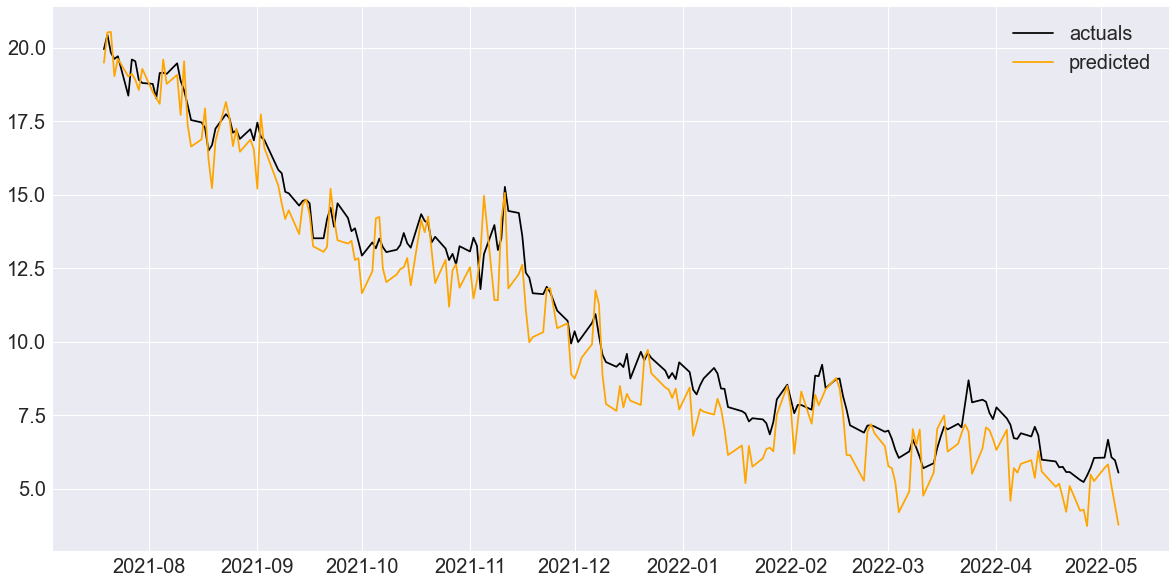

In [126]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['cgc_next_close'], color='black')
ax.plot(y_test3['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [127]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [128]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [129]:
df_isna4 = df_isna4.add_suffix('_b')

In [130]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [131]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [132]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [133]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [134]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [135]:
df4.drop(df4.tail(1).index, inplace=True)

In [136]:
n = int(len(df4) * 0.9)
n

1833

In [137]:
train4 = df4[:n]
test4 = df4[n:]

In [138]:
print(len(train4))
print(len(test4))

1833
204


In [139]:
X_train4 = train4.drop('cgc_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [140]:
X_train4.shape

(1833, 289)

In [141]:
y_train4 = train4['cgc_next_close']
y_train4.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [142]:
y_train4.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [143]:
X_test4 = test4.drop('cgc_next_close', axis=1)
y_test4 = test4['cgc_next_close']

In [144]:
X_test4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-19              -0.387      10.795       10.80       10.2   
2021-07-20              -0.293      10.650       10.81       10.5   
2021-07-21              -0.176      10.600       10.91       10.6   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-19        10.59     1108300.0             11.00             10.62   
2021-07-20        10.62      474600.0             10.59             10.72   
2021-07-21        10.72      592900.0             10.62             10.72   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-19       -0.41      -0.037273                10.972   
2021-07-20        0.03       0.002833                10.832   
2021-07-21        0.10       0.009416                10.816   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-19               -0.162                 11.135                -0.073   
2021-07-20               -0.140                 11.097                -0.038   
2021-07-21               -0.016                 11.039                -0.058   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-19       7.04       7.18      6.95        7.16    2036200.0   
2021-07-20       7.19       7.36      7.00        7.33    1035600.0   
2021-07-21       7.34       7.49      7.28        7.43     923500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-19             7.18             7.33      -0.02     -0.002786   
2021-07-20             7.16             7.43       0.17      0.023743   
2021-07-21             7.33             7.23       0.10      0.013643   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-19                7.532              -0.176                 7.786   
2021-07-20                7.376              -0.156                 7.709   
2021-07-21                7.328              -0.048                 7.652   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-19               -0.119      13.000      13.151     12.300   
2021-07-20               -0.077      12.626      12.940     12.500   
2021-07-21               -0.057      13.000      13.

In [145]:
X_test4.shape

(204, 289)

In [146]:
y_test4.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [147]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [148]:
y_pred4[:5]

array([19.60430858, 20.4151167 , 20.52273955, 19.11769772, 19.61759642])

In [149]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.8994107705541007


In [150]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.7417395987032013


In [151]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [152]:
y_train4 = pd.DataFrame(y_train4, columns=['cgc_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['cgc_next_close'])

In [153]:
y_test4['cgc_pred_next_close'] = y_pred4

In [154]:
y_test4.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             5.827320
2022-05-03            6.67             6.148888
2022-05-04            6.07             4.945757
2022-05-05            5.97             4.988465
2022-05-06            5.55             3.964216

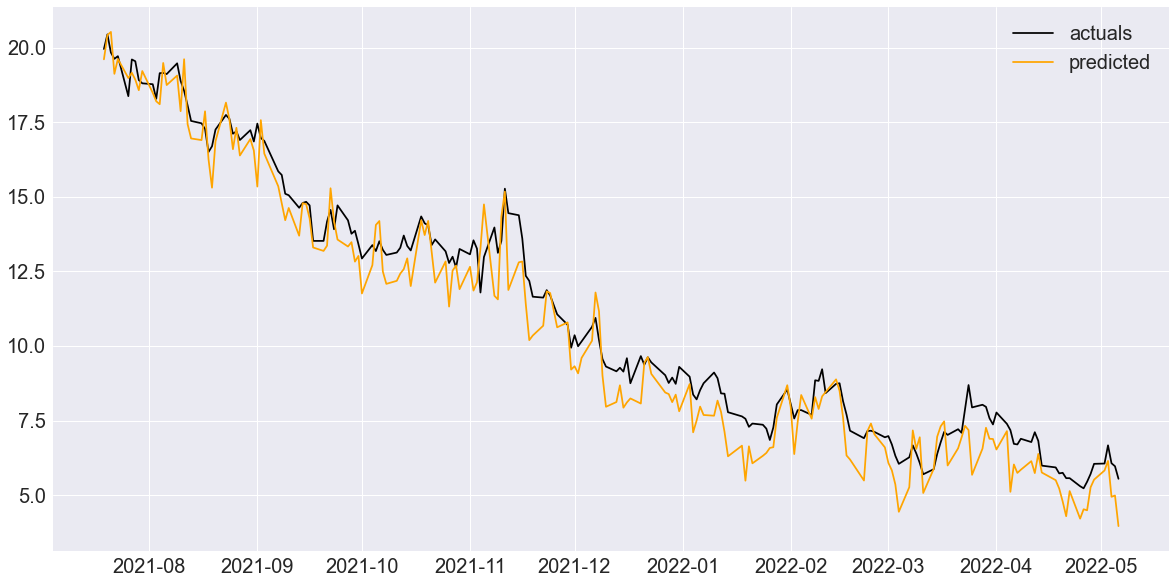

In [155]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['cgc_next_close'], color='black')
ax.plot(y_test4['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [156]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [157]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [158]:
df_isna5 = df_isna5.add_suffix('_b')

In [159]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [160]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [161]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [162]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [163]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [164]:
df5.drop(df5.tail(1).index, inplace=True)

In [165]:
n = int(len(df5) * 0.9)
n

1833

In [166]:
train5 = df5[:n]
test5 = df5[n:]

In [167]:
print(len(train5))
print(len(test5))

1833
204


In [168]:
X_train5 = train5.drop('cgc_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [169]:
X_train5.shape

(1833, 393)

In [170]:
y_train5 = train5['cgc_next_close']
y_train5.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [171]:
y_train5.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [172]:
X_test5 = test5.drop('cgc_next_close', axis=1)
y_test5 = test5['cgc_next_close']

In [173]:
X_test5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-19              -0.387      10.795       10.80       10.2   
2021-07-20              -0.293      10.650       10.81       10.5   
2021-07-21              -0.176      10.600       10.91       10.6   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-19        10.59     1108300.0             11.00             10.62   
2021-07-20        10.62      474600.0             10.59             10.72   
2021-07-21        10.72      592900.0             10.62             10.72   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-19       -0.41      -0.037273                10.972   
2021-07-20        0.03       0.002833                10.832   
2021-07-21        0.10       0.009416                10.816   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-19               -0.162                 11.135                -0.073   
2021-07-20               -0.140                 11.097                -0.038   
2021-07-21               -0.016                 11.039                -0.058   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-19       7.04       7.18      6.95        7.16    2036200.0   
2021-07-20       7.19       7.36      7.00        7.33    1035600.0   
2021-07-21       7.34       7.49      7.28        7.43     923500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-19             7.18             7.33      -0.02     -0.002786   
2021-07-20             7.16             7.43       0.17      0.023743   
2021-07-21             7.33             7.23       0.10      0.013643   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-19                7.532              -0.176                 7.786   
2021-07-20                7.376              -0.156                 7.709   
2021-07-21                7.328              -0.048                 7.652   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-19               -0.119      13.000      13.151     12.300   
2021-07-20               -0.077      12.626      12.940     12.500   
2021-07-21               -0.057      13.000      13.

In [174]:
X_test5.shape

(204, 393)

In [175]:
y_test5.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [176]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [177]:
y_pred5[:5]

array([19.69072708, 21.13147799, 20.48521047, 19.6417293 , 20.30148245])

In [178]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.7653049815808796


In [179]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.615630387034166


In [180]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [181]:
y_train5 = pd.DataFrame(y_train5, columns=['cgc_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['cgc_next_close'])

In [182]:
y_test5['cgc_pred_next_close'] = y_pred5

In [183]:
y_test5.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             6.381639
2022-05-03            6.67             6.414780
2022-05-04            6.07             5.561607
2022-05-05            5.97             4.998918
2022-05-06            5.55             4.946287

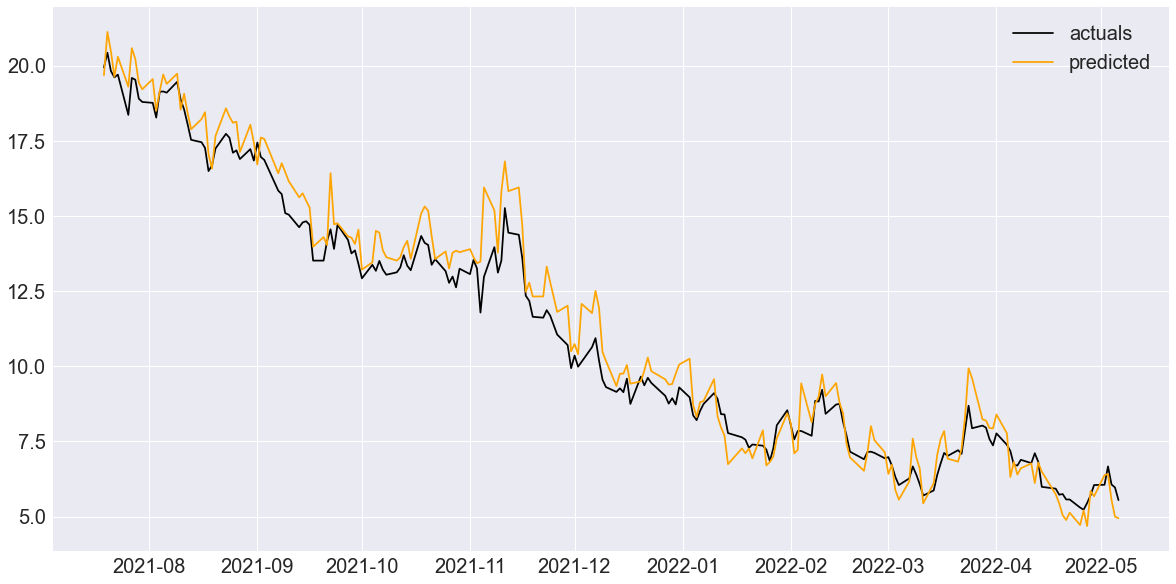

In [184]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['cgc_next_close'], color='black')
ax.plot(y_test5['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [185]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [186]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [187]:
df_isna6 = df_isna6.add_suffix('_b')

In [188]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [189]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [190]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [191]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [192]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [193]:
df6.drop(df6.tail(1).index, inplace=True)

In [194]:
n = int(len(df6) * 0.9)
n

1833

In [195]:
train6 = df6[:n]
test6 = df6[n:]

In [196]:
print(len(train6))
print(len(test6))

1833
204


In [197]:
X_train6 = train6.drop('cgc_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [198]:
X_train6.shape

(1833, 419)

In [199]:
y_train6 = train6['cgc_next_close']
y_train6.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [200]:
y_train6.tail(3)

Date
2021-07-14    20.35
2021-07-15    19.58
2021-07-16    19.41
Name: cgc_next_close, dtype: float64

In [201]:
X_test6 = test6.drop('cgc_next_close', axis=1)
y_test6 = test6['cgc_next_close']

In [202]:
X_test6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-19      7   19  2021        3  19.059999  19.620001  18.850000   
2021-07-20      7   20  2021        3  19.480000  20.055000  18.940001   
2021-07-21      7   21  2021        3  20.000000  20.459999  19.801001   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-19  19.410000     3332300       19.580000 -0.170000    -0.008682   
2021-07-20  19.950001     2289600       19.410000  0.540001     0.027821   
2021-07-21  20.440001     1882800       19.950001  0.490000     0.024561   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-19              20.422             -0.564               21.336   
2021-07-20              19.990             -0.432               21.043   
2021-07-21              19.946             -0.044               20.867   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-19              -0.387      10.795       10.80       10.2   
2021-07-20              -0.293      10.650       10.81       10.5   
2021-07-21              -0.176      10.600       10.91       10.6   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-19        10.59     1108300.0             11.00             10.62   
2021-07-20        10.62      474600.0             10.59             10.72   
2021-07-21        10.72      592900.0             10.62             10.72   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-19       -0.41      -0.037273                10.972   
2021-07-20        0.03       0.002833                10.832   
2021-07-21        0.10       0.009416                10.816   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-19               -0.162                 11.135                -0.073   
2021-07-20               -0.140                 11.097                -0.038   
2021-07-21               -0.016                 11.039                -0.058   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-19       7.04       7.18      6.95        7.16    2036200.0   
2021-07-20       7.19       7.36      7.00        7.33    1035600.0   
2021-07-21       7.34       7.49      7.28        7.43     923500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-19             7.18             7.33      -0.02     -0.002786   
2021-07-20             7.16             7.43       0.17      0.023743   
2021-07-21             7.33             7.23       0.10      0.013643   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-19                7.532              -0.176                 7.786   
2021-07-20                7.376              -0.156                 7.709   
2021-07-21                7.328              -0.048                 7.652   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-19               -0.119      13.000      13.151     12.300   
2021-07-20               -0.077      12.626      12.940     12.500   
2021-07-21               -0.057      13.000      13.

In [203]:
X_test6.shape

(204, 419)

In [204]:
y_test6.tail(3)

Date
2022-05-04    6.07
2022-05-05    5.97
2022-05-06    5.55
Name: cgc_next_close, dtype: float64

In [205]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [206]:
y_pred6[:5]

array([19.64363709, 21.17723408, 20.4915634 , 19.58330951, 20.25588491])

In [207]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.7089862147417538


In [208]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.5583992820872924


In [209]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [210]:
y_train6 = pd.DataFrame(y_train6, columns=['cgc_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['cgc_next_close'])

In [211]:
y_test6['cgc_pred_next_close'] = y_pred6

In [212]:
y_test6.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-02            6.06             6.360264
2022-05-03            6.67             6.250213
2022-05-04            6.07             5.697560
2022-05-05            5.97             4.917560
2022-05-06            5.55             4.973574

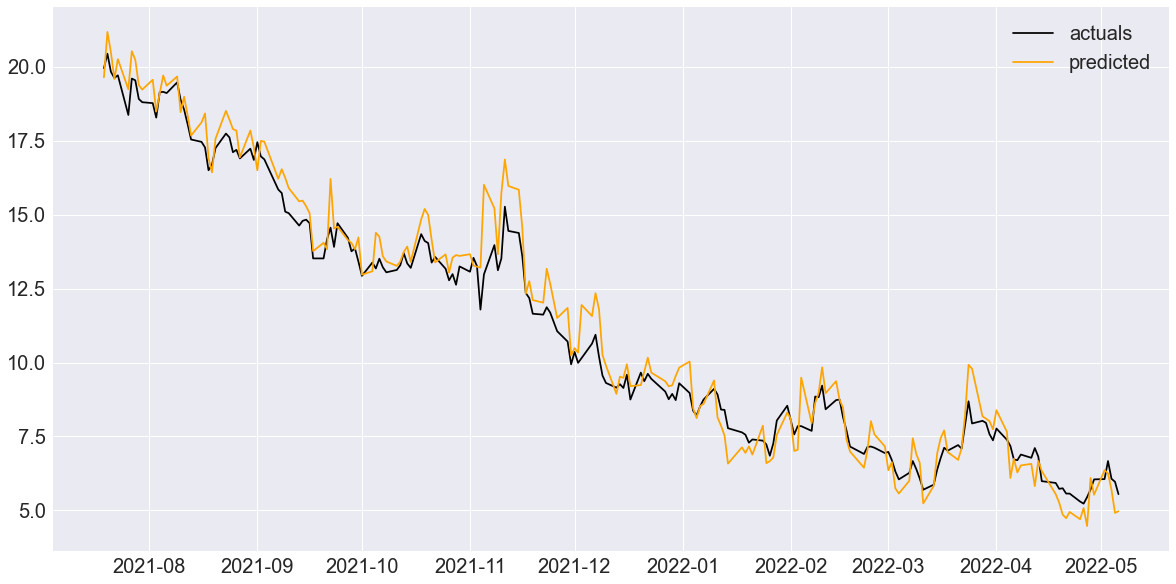

In [213]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['cgc_next_close'], color='black')
ax.plot(y_test6['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [214]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.366463  0.253406  2037        1833   
0         1+Dow  LinearRegression()  0.460665  0.354889  2037        1833   
2    1+ETFs+Dow  LinearRegression()  0.490005  0.376857  2037        1833   
6  All+ETFs+Dow  LinearRegression()  0.708986  0.558399  2037        1833   
5      All+ETFs  LinearRegression()  0.765305  0.615630  2037        1833   
4       All+Dow  LinearRegression()  0.899411  0.741740  2037        1833   
3    All stocks  LinearRegression()  1.024532  0.851435  2037        1833   

   test_rows  columns  
1        204      160  
0        204       56  
2        204      186  
6        204      420  
5        204      394  
4        204      290  
3        204      264

In [215]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)